In [2]:
#Part-1 Data Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df_test=pd.read_csv('Google_Stock_Price_Test.csv')
training_set = df_train.iloc[:,1:2].values
print(training_set.shape)

(1258, 1)


In [39]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
trainingset_scaled = sc.fit_transform(training_set)

In [43]:
#Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(trainingset_scaled[i-60:i,0])
    y_train.append(trainingset_scaled[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)
print(X_train.shape,y_train.shape)

(1198, 60) (1198,)


In [44]:
#Reshaping
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [45]:
#Building the RNN
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model = Sequential()

#Layer-1
model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))#usually 20% of the neurons are dropped
#Layer-2
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
#Layer-3
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
#Layer-4
model.add(LSTM(units=100,return_sequences=False))#units indicats the number of neurons in the layer
model.add(Dropout(0.2))
#Adding the ouput layer
model.add(Dense(units=1))

In [46]:
#Compiling the RNN/LSTM
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 60, 100)           40800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 100)           80400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 100)           80400     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)              

In [ ]:
#Fitting an RNN to the training set
model.fit(X_train,y_train,epochs=100,batch_size=32)#It would be trained on batches of observations,so instaed of weights being updated everytime, it is updates every 32 stock times

Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0294
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0047
Epoch 3/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0044
Epoch 4/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0039
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0036
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0037
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0033
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0036
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0035
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0027
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0031
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

1198/1198 [==============================] - 5s 4ms/step - loss: 0.0010
Epoch 98/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0010
Epoch 99/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0011
Epoch 100/100
1056/1198 [=========================>....] - ETA: 0s - loss: 0.0010

In [31]:
#Making the predictions and visualizing the results
#get the real stock of Google
real_stock_price = df_test.iloc[:,1:2].values
print(test_set.shape)

#Get predicted stock price
dataset_total = pd.concat((df_train['Open'],df_test['Open']),axis=0)#Horizontal=1,Vertical=0
inputs = dataset_total[len(dataset_total)-len(df_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

(20, 1)


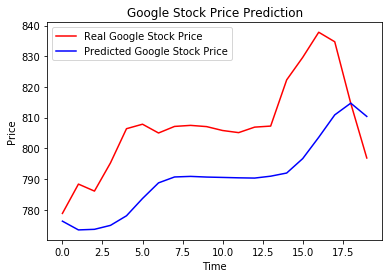

In [32]:
#Visualising the stock price
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()